# hough lines

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline 

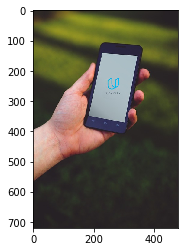

In [2]:
image = cv2.imread('images/phone.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

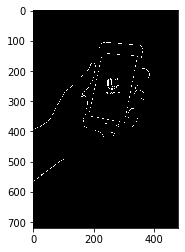

In [3]:
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
low_thresh = 120
high_thresh = 240
edges = cv2.Canny(gray,low_thresh,high_thresh)
plt.imshow(edges,cmap='gray')

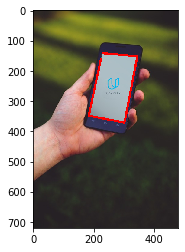

In [11]:
rho = 1
theta = np.pi/180
threshold = 60
min_line_length = 95
max_line_gap = 5

line_image = np.copy(image)
lines = cv2.HoughLinesP(edges,rho,theta,threshold,np.array([]),min_line_length,max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
        
plt.imshow(line_image)

# hough circle

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

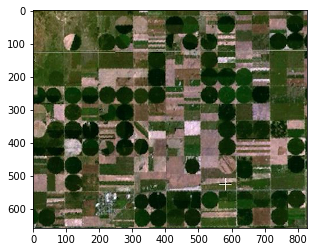

In [13]:
image = cv2.imread('images/round_farms.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

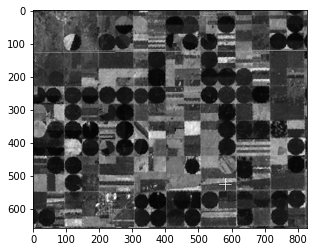

In [15]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray,(3,3),0)
plt.imshow(gray_blur,cmap='gray')

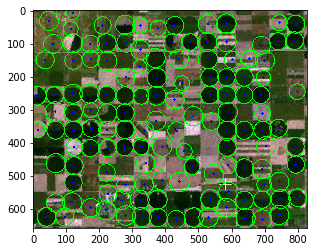

In [22]:
circles_im = np.copy(image)
circles = cv2.HoughCircles(gray_blur, cv2.HOUGH_GRADIENT, 1, 
                           minDist=45,
                           param1=70,
                           param2=11,
                           minRadius=20,
                           maxRadius=30)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    cv2.circle(circles_im,(i[0],i[1]),i[2],(0,255,0),2)
    cv2.circle(circles_im,(i[0],i[1]),2,(0,0,255),3)
plt.imshow(circles_im)